# ML Zoomcamp Week 6 - Credit Risk Scoring Project

- The following notebook , will analyze the aplication of credit , with a model, it will help a bank to check the risk that the customer will <b> Default </b> (Default is the failure to repay a debt)
- Analyze the historical data of the customers , and then , for each aplication we will check if the customer are able to pay the loan or not

$$ y_i \in {0,1} $$

Where : <br>
$ 0 \rightarrow OK \\
1 \rightarrow DEFAULT $

$$ g(x_i) \rightarrow Prob \ of \ Default $$


From the credit scoring data set:
[Credit scoring analysis](https://github.com/gastonstat/CreditScoring)


<table>
<tbody>
<tr><td><b>1  Status</b></td> <td>credit status</td></tr>
<tr><td><b>2  Seniority</b></td> <td>job seniority (years)</td></tr>
<tr><td><b>3  Home</b></td> <td>type of home ownership</td></tr>
<tr><td><b>4  Time</b></td> <td>time of requested loan</td></tr>
<tr><td><b>5  Age</b></td> <td>client's age </td></tr>
<tr><td><b>6  Marital</b></td> <td>marital status </td></tr>
<tr><td><b>7  Records</b></td> <td>existance of records</td></tr>
<tr><td><b>8  Job</b></td> <td>type of job</td></tr>
<tr><td><b>9  Expenses</b></td> <td> amount of expenses</td></tr>
<tr><td><b>10 Income</b></td> <td> amount of income</td></tr>
<tr><td><b>11 Assets</b></td> <td> amount of assets</td></tr>
<tr><td><b>12 Debt</b></td> <td> amount of debt</td></tr>
<tr><td><b>13 Amount</b></td> <td> amount requested of loan</td></tr>
<tr><td><b>14 Price</b></td> <td> price of good</td></tr>
</tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'


!wget -nc $data

File 'CreditScoring.csv' already there; not retrieving.



In [3]:
!head CreditScoring.csv # Shows the information in the file

'head' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df = pd.read_csv(data)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


- Translating the following r code into python code (categorical variables)

```r 
# change factor levels (i.e. categories)
levels(dd$Status) = c("good", "bad")
levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")
levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")
levels(dd$Records) = c("no_rec", "yes_rec")
levels(dd$Job) = c("fixed", "partime", "freelance", "others")

```

In [6]:
status_values={
    1:'ok',
    2:'default',
    0:'unk'
}



df.status = df.status.map(status_values) # mapping a dictionary

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)



In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
df.describe().round(2)

#  (99999999.00) Missing numbers 

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


In [9]:
for c in ['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999 ,value =np.nan )

In [10]:
df.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4421.00,4408.00,4437.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,130.57,5403.43,342.95,1039.02,1462.88
std,8.17,14.66,10.98,19.52,86.37,11573.16,1245.86,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3000.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,165.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,959.00,300000.00,30000.00,5000.00,11140.00


In [11]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [12]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)


In [15]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [16]:
del df_train['status']
del df_val['status']
del df_test['status']

## 6.3 Decision Trees

- Checking if they got a record or not

In [17]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000 :
            return 'ok'
        else:
            return 'default'


In [18]:
xi = df_train.iloc[0].to_dict()

In [19]:
assess_risk(xi)

'ok'

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score # area under AUC curve
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [21]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

<i> Training the Dictionary </i>

In [22]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [23]:
from collections import Counter

np.isnan(X_train).sum()

0

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [26]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [27]:
y_pred = dt.predict_proba(X_val)[:,1] # taking the second column

In [28]:
og_auc = roc_auc_score(y_val,y_pred) # area under AUC curve
og_auc

0.6502415780678598

In [29]:
# For TRAINING data set

y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

# Overfitting

- Model only memorizes the data , can't calculate new examples (can't generalize)


For only 3 levels

In [30]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [31]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)

print('Train: ',auc)
print('Difference in performance : ', (og_auc - auc).round(2))

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val : ',auc)



Train:  0.7761016984958594
Difference in performance :  -0.13
val :  0.7389079944782155


` Decision Stump : only one condition` 

In [32]:
from sklearn.tree import export_text

print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- feature_27 <= 6.50
|   |   |--- feature_1 <= 862.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  862.50
|   |   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- feature_12 <= 103.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  103.50
|   |   |   |--- class: 0
|--- feature_25 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_12 <= 74.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  74.50
|   |   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- feature_2 <= 8750.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  8750.00
|   |   |   |--- class: 0



 ##  For a max_depth of 1

In [33]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)


y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)

print('Train: ',auc)
print('Difference in performance : ', (og_auc - auc).round(2))

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val : ',auc)


Train:  0.6282660131823559
Difference in performance :  0.02
val :  0.6058644740984719


(Decision Stamp)

In [34]:
from sklearn.tree import export_text

print(export_text(dt,feature_names=dv.get_feature_names())) # printing the decision stump

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



 ###  For a max_depth of 2

In [35]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)


y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)

print('Train: ',auc)
print('Difference in performance : ', (og_auc - auc).round(2))

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val : ',auc)

Train:  0.7054989859726213
Difference in performance :  -0.06
val :  0.6685264343319367


In [36]:
from sklearn.tree import export_text

print(export_text(dt,feature_names=dv.get_feature_names())) # printing the decision stump



|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



## 6.4 Decision Tree Learning Algorithm


In [37]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


- What's the best T ?

In [38]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [39]:
# potencial threesholds

Ts = [0, 2000,3000,4000,5000,8000]

# cutting the data set into left and right parts

In [40]:
from IPython.display import display

for T in Ts: 
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T] 
    display(df_left)
    print(df_left.status.value_counts(normalize=True)) # normalize to check percentages
    display(df_right)
    print(df_right.status.value_counts(normalize=True))


0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64
5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64
8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64


### Table for Split: assets > T

| T    	| Decision  Left 	| Impurity  Left 	| Decision Right 	| Impurity Right 	| AVG  	|
|------	|----------------	|----------------	|----------------	|----------------	|------	|
| 0    	| DEFAULT        	| 0 %            	| OK             	| 43 %           	| 21 % 	|
| 2000 	| DEFAULT        	| 0 %            	| OK             	| 33 %           	| 16 % 	|
| 3000 	| DEFAULT        	| 0 %            	| OK             	| 20 %           	| 10 % 	|
| 4000 	| DEFAULT        	| 25 %           	| OK             	| 25 %           	| 25 % 	|
| 5000 	| DEFAULT        	| 50             	| OK             	| 50 %           	| 50 % 	|
| 8000 	| DEFAULT        	| 43 %           	| OK             	| 0 %            	| 21 % 	|

<i> 3000 got the best impurity score </i>

## For Two Features (Adding Debt )

In [41]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [42]:
TS = [500,100,2000] # Selecting thresholds

thresholds= {
    'assets': [0,2000,3000,4000,5000,8000],
    'debt' : [500,1000,2000]
}

In [43]:
for feature,Ts in thresholds.items():
    print('--------------------')
    print(feature)
    for T in Ts: 
        print(T)
        df_left = df_example[df_example.assets <= T]
        df_right = df_example[df_example.assets > T] 
        display(df_left)
        print(df_left.status.value_counts(normalize=True)) # normalize to check percentages
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        

--------------------
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64
5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64
8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64
--------------------
debt
500


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
1000


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64


## For Debt

| T    	| Decision  Left 	| Impurity  Left 	| Decision Right 	| Impurity Right 	| AVG  	|
|------	|----------------	|----------------	|----------------	|----------------	|------	|
| 500  	| OK             	| 0 %            	| DEFAULT        	| 43 %           	| 21 % 	|
| 1000 	| OK             	| 33 %           	| DEFAULT        	| 0 %            	| 16 % 	|
| 2000 	| OK             	| 43 %           	| DEFAULT        	| 0 %            	| 21 % 	|


` Pseudocode `

```python
    FOR F IN FEATURES :
        FIND ALL THRESHOLDS FOR F
        FOR T IN THRESHOLDS:
            SPLIT DATASET USING "F > T" CONDITION
            COMPUTE THE IMPURITY OF THE SPLIT
    SELECT THE CONDITION WITH LOWEST IMPURITY
```

## Stopping Criteria

- Group already pure.
- Max Depth (Tree reached depth limit).
- Group is too small to split, so stop the recursion.

## Decision tree learning algorithm. (Misclassification)
<ol type="1">

<li> Find the best split. </li>
<li> Stop if max_depth is reached. </li>
<li> if left is sufficiently large, and NOT pure: <br>
     -> Repeat for LEFT</li>
<li> if right is sufficiently large, and NOT pure: <br>
     -> Repeat for RIGHT</li>
</ol>


## 6.5 Decision Trees Parameter Tuning

- Selecting the `max_depth`
- Selecting `min_samples_leaf`

In [44]:
# adjusting the max depth parameter 
for d in [1,2,3,4,5,6,10,15,20,None]: # None means no restricting 
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print(" %4s -> %.3f" %(d,auc))

    1 -> 0.606
    2 -> 0.669
    3 -> 0.739
    4 -> 0.761
    5 -> 0.767
    6 -> 0.750
   10 -> 0.699
   15 -> 0.660
   20 -> 0.655
 None -> 0.654


Depth from $[4,6]$

In [45]:
scores = []

# selecting min_samples_leaf
for d in [4,5,6,7,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s) # The minimum number of samples required to be at a leaf node
        dt.fit(X_train,y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,s,auc))
        
columns = ['max_depth','min_samples_leaf','auc']

df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()            


,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [46]:
df_scores.sort_values(by='auc',ascending=False).head()

,max_depth,min_samples_leaf,auc
40,10.0,15,0.791371
67,NaN,15,0.787478
49,15.0,15,0.787348
58,20.0,15,0.787278
41,10.0,20,0.785907


In [47]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                  columns=['max_depth'],
                                  values=['auc']) # Column, row ,value

df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.654  0.761  0.767  0.748  0.744  0.692  0.653  0.644
2                 0.687  0.761  0.767  0.750  0.755  0.714  0.684  0.689
5                 0.713  0.761  0.768  0.760  0.758  0.723  0.720  0.714
10                0.765  0.761  0.762  0.778  0.765  0.768  0.764  0.760
15                0.787  0.764  0.772  0.785  0.779  0.791  0.787  0.787
20                0.783  0.761  0.774  0.774  0.781  0.786  0.782  0.784
100               0.780  0.756  0.763  0.776  0.780  0.779  0.780  0.780
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

## Visualizing it as a heatmap

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

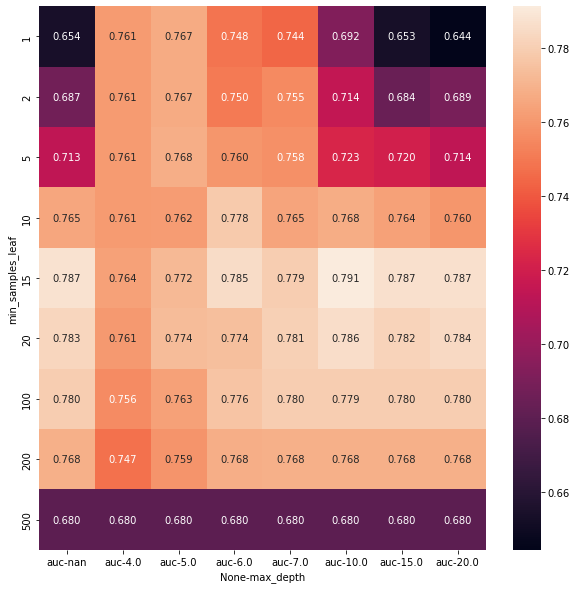

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df_scores_pivot,annot=True,fmt='.3f')

### Selecting a max depth of 6 and min_samples_leaf of 15

In [49]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)

- Bootstrapping data , and agregating to make a decision is called bagging in random forests

##  6.6 - Ensemble Learning and Random Forest


- A board of experts , agregates to make a decision based on the mayority of votes (If some of them disagrees) , tantamount to that, we use a random a forest

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [51]:
rf = RandomForestClassifier(n_estimators=10)

# n_estimators represents the number of trees in the forest. Usually the higher the number of trees 
# the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [52]:
y_pred = rf.predict_proba(X_val)[:,1]


In [53]:
roc_auc_score(y_val, y_pred)

0.7792103606112712

In [54]:
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

In [55]:
scores = []
for n in range(10,201,10): # from 10 to 200
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((n,auc))

In [56]:

columns = ['number_estimators','AUC_score']
df= pd.DataFrame(scores,columns=columns)

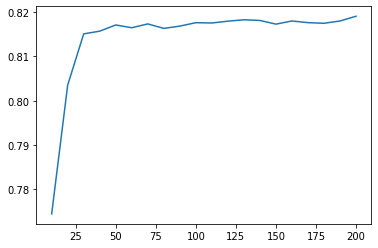

In [57]:
plt.plot(df.number_estimators,df.AUC_score)

After 50 , the score stops increasing significantly, so we may as well use 50 estimators (experts)

In [58]:
scores = []

for d in [5,10,15]: # changing the depth of the decision trees in the RF
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,random_state=1,max_depth=d)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,n,auc))

In [59]:
columns = ['max_depth','number_estimators','AUC_score']

df_scores  = pd.DataFrame(scores,columns=columns)

df_scores.head()


,max_depth,number_estimators,AUC_score
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


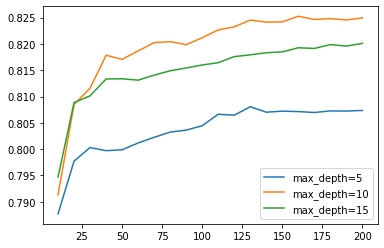

In [60]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d ]
    plt.plot(df_subset.number_estimators,df_subset.AUC_score,label='max_depth=%s'%d)
    
plt.legend()

As seen in the graph, Depth is important for decisionTree , the value of max_depth = 10 seems to be the more ideal.

In [61]:
max_depth = 10


In [62]:
scores = []
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n, random_state=1, max_depth=max_depth, min_samples_leaf=s)  # changing leafs samples
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))


In [63]:
columns = ['min_samples_leaf','number_estimators','AUC_score']

df_scores  = pd.DataFrame(scores,columns=columns)

df_scores.head()

,min_samples_leaf,number_estimators,AUC_score
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


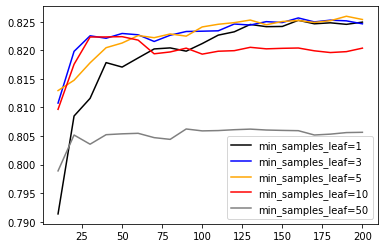

In [64]:
colors = ['black','blue','orange','red','grey']
min_samples_leaf_values =  [1, 3, 5, 10, 50]
# looping over values of s

for s, col in zip(min_samples_leaf_values,colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s ]
    plt.plot(df_subset.number_estimators,df_subset.AUC_score,label='min_samples_leaf=%s'%s,color=col)
    
plt.legend()

Bootstraping

## Optional: Ada Boost

- [ ] `#TODO: Python implementation`


- In Random Forests there's not predetermined maximum depth (unless specified)
- In contrast, in a Forest of trees with AdaBoost , the trees are usually just a node and two leaves.
- A tree with just one node , and two leaves is called a Decision stump. (Stumps are weak learners)

Main ideas behind Ada Boost:
<ol>

<li>AdaBoost combines a lot of "weak learners" to make classifications . The weak learning are almos always <b>stumps </b> </li>
<li>Some </b> stumps </b> get more say in the classifications than others </li>
<li>Each stump si made by taking the previus stump's mistakes into account.</li> </b> </li>

</ol>

## Calculating  the amount of  say , according to the total error

 $$ Amount \ of \ say= \frac{1}{2} log(\frac{1-Totalerror}{Totalerror})$$

When a stump is good, (<b> Small Total error</b>), then it has a good amount of stay

- Increasing the sample weight for incorrectly classified samples for stumps.

$$ New \ Sample \ Weight = sample \ weight * e^{amount \ of \ say}$$

- For the correctly classified samples:


$$ New \ Sample \ Weight = sample \ weight * e^{ - amount \ of \ say}$$

##  6.7 - Gradient Boosting and XGBoost ( more regularized form of Gradient Boosting)


- Look up at the errors of a model, and based on that errors , we can made another model 

- Train a third model that changes the prediction of the last model

In [65]:
!pip install xgboost

In [66]:
import xgboost as xgb

In [67]:

features = dv.get_feature_names()

dtrain = xgb.DMatrix(X_train, label=y_train,feature_names=features)

dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [68]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
 # used to evaluate the model

In [150]:

%%capture output

# get the output of the cell 

xgb_params = { 
    'eta': 0.1,   
    'max_depth': 3 , 
    'min_child_weight':1,     
    'objective': 'binary:logistic', # binary:logistic regression   
    'eval_metric': 'auc',
    'nthread':8, 
    'seed':1,
    'verbosity':1
    }


model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [151]:
# adding scores for eta 
scores= {}


In [152]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_XGB_output(output)
key


'eta=0.1'

In [153]:
scores.keys()

dict_keys(['eta=0.1'])

# Plotting the results 

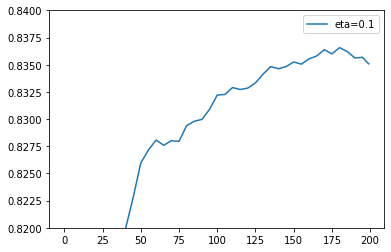

In [154]:

for max_dep,df_score in scores.items():
    plt.plot(df_score.num_iter,df_score.val_auc,label=max_dep)
    
plt.ylim(0.82,0.84)
plt.legend()

-  best score ( eta = 0.1)
- best max_depth=3

In [155]:
xgb.train(xgb_params,dtrain,num_boost_round=200) # how many trees we want to grow ?

In [158]:
s = output.stdout
line = s.split('\n')[0]

In [159]:
def parse_XGB_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        num_iter,train_auc,val_auc = line.split('\t')
        
        Iterations = int(num_iter.strip(('[]')))
        train = float(train_auc.split(':')[1])
        val = float(val_auc.split(':')[1])
        
        results.append((Iterations, train, val))
    
    columns = ['num_iter','train_auc','val_auc']
    df_results = pd.DataFrame(results,columns=columns)
    
    return df_results

In [160]:
df_score = parse_XGB_output(output)

df_score


,num_iter,train_auc,val_auc
0,0,0.77424,0.73571
1,5,0.83122,0.77763
2,10,0.84733,0.78964
3,15,0.85566,0.80035
4,20,0.86359,0.80617
5,25,0.87161,0.81051
6,30,0.87855,0.81478
7,35,0.88298,0.81792
8,40,0.88701,0.81990
9,45,0.89137,0.82277


## Overfitting

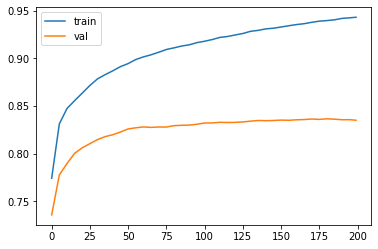

In [161]:

plt.plot(df_score.num_iter,df_score.train_auc,label='train')
plt.plot(df_score.num_iter,df_score.val_auc,label='val')
plt.legend()

## Plotting the XGBoost

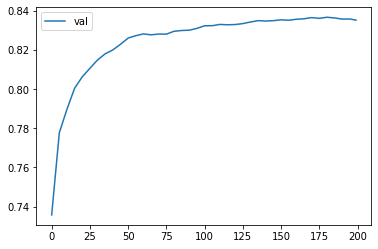

In [162]:
plt.plot(df_score.num_iter,df_score.val_auc,label='val')
plt.legend()

In [103]:
y_pred = model.predict(dval) 

In [104]:
roc_auc_score(y_val,y_pred)

0.8360387251459157

## 6.8 - XGBoost Parameter Tuning

Eta : Learning Rate

6.9 - Selecting the Best Model


# Decision Tree

In [105]:
dt= DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [106]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.785470804775859

# Random Forest

In [107]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf =3 ,
                            random_state =1 
                            
                            
                            )
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [108]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

# XG Boost 

In [109]:


xgb_params = { 
    'eta': 0.1,   
    'max_depth': 3 , 
    'min_child_weight':1,     
    'objective': 'binary:logistic', # binary:logistic regression   
    'eval_metric': 'auc',
    'nthread':8, 
    'seed':1,
    'verbosity':1
    }

model = xgb.train(xgb_params,
                  dtrain,
                  num_boost_round=175)

In [110]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8360387251459157

In [111]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
3559,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
3560,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3561,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [112]:
y_full_train = (df_full_train.status =='default').astype(int).values

In [113]:
del df_full_train['status']

In [114]:
dicts_full_train = df_full_train.to_dict(orient='records')

# dictionaries into vectors

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

# getting the feature matrix from test dataset

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [115]:
dfulltrain = xgb.DMatrix(X_full_train,
                         label=y_full_train,
                         feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test,
                         feature_names=dv.get_feature_names())

In [116]:


xgb_params = { 
    'eta': 0.1,   
    'max_depth': 3 , 
    'min_child_weight':1,     
    'objective': 'binary:logistic', # binary:logistic regression   
    'eval_metric': 'auc',
    'nthread':8, 
    'seed':1,
    'verbosity':1
    }

model = xgb.train(xgb_params,
                  dfulltrain,
                  num_boost_round=175)

In [118]:
y_pred = model.predict(dtest)

In [119]:
y_pred[:10]

array([0.24035443, 0.18355751, 0.0865014 , 0.23431301, 0.3524028 ,
       0.28965375, 0.00877119, 0.02481344, 0.21857312, 0.23013479],
      dtype=float32)

In [120]:
roc_auc_score(y_test, y_pred)

0.8322662626460096